In [9]:
import pandas as pd

# Load ratings
ratings = pd.read_csv("../data/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
print(ratings.head())

# Load movies
movies = pd.read_csv("../data/u.item", sep="|", encoding="latin-1", header=None)
movies = movies[[0, 1]]  # keep only movie_id and title
movies.columns = ["movie_id", "title"]

# Merge
df = pd.merge(ratings, movies, on="movie_id")
print(df.head())


   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   user_id  movie_id  rating  timestamp                       title
0      196       242       3  881250949                Kolya (1996)
1      186       302       3  891717742    L.A. Confidential (1997)
2       22       377       1  878887116         Heavyweights (1994)
3      244        51       2  880606923  Legends of the Fall (1994)
4      166       346       1  886397596         Jackie Brown (1997)


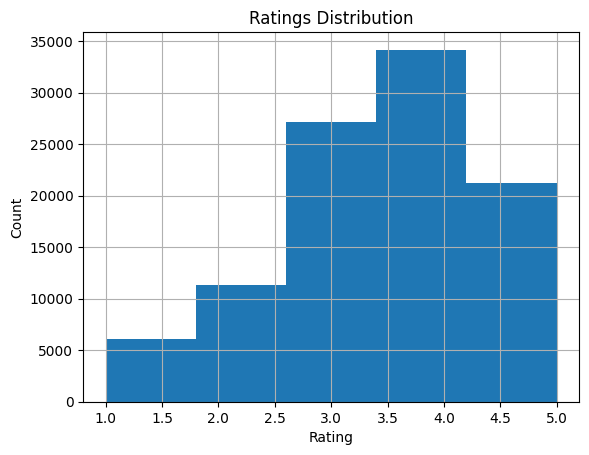

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
Star Kid (1997)                                      5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Someone Else's America (1995)                        5.0
Name: rating, dtype: float64


In [10]:
import matplotlib.pyplot as plt

df['rating'].hist(bins=5)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings Distribution")
plt.show()

top_movies = df.groupby("title")['rating'].mean().sort_values(ascending=False).head(10)
print(top_movies)


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Create user-movie rating matrix
user_movie_matrix = df.pivot_table(index="user_id", columns="title", values="rating")

# Fill NaN with 0
user_movie_matrix = user_movie_matrix.fillna(0)

# Compute similarity between movies
similarity_matrix = cosine_similarity(user_movie_matrix.T)
similarity_df = pd.DataFrame(similarity_matrix, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

# Function to recommend movies
def recommend(movie_title, n=5):
    similar_scores = similarity_df[movie_title].sort_values(ascending=False)[1:n+1]
    return similar_scores

print(recommend("Star Wars (1977)", 5))


title
Return of the Jedi (1983)          0.884476
Raiders of the Lost Ark (1981)     0.764885
Empire Strikes Back, The (1980)    0.749819
Toy Story (1995)                   0.734572
Godfather, The (1972)              0.697332
Name: Star Wars (1977), dtype: float64


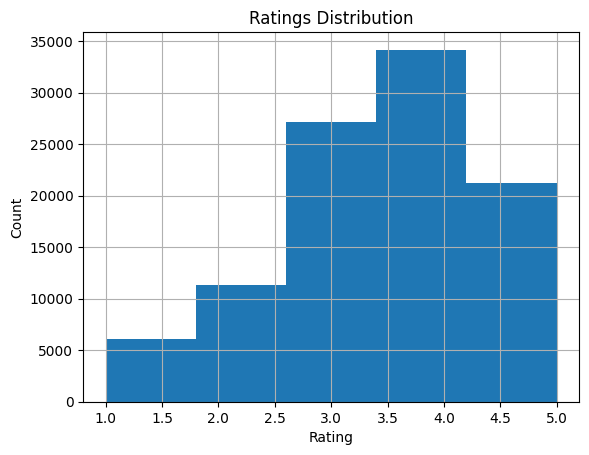

In [13]:
import matplotlib.pyplot as plt

df['rating'].hist(bins=5)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings Distribution")
plt.savefig("../images/ratings_distribution.png")  # save plot
plt.show()
